# Simulation of AR(2) process
x_t=phi1*x_(t-1)+phi2*x_(t-2)+z_t
z_t~ N(0, sigma^2)

## set seed a common number, so we can reproduce the same datasets

In [1]:
set.seed(2017)

## model parameters (we will estimate them)


In [7]:
sigma=4  # varianza del ruido (media 0)
phi=NULL
phi[1:2]=c(1/3,1/2)  # coeficientes del AR(2)
str(phi)

 num [1:2] 0.333 0.5


Estos tres parámetros son los que intentaremos estimar.

Los $\phi$ saldrán con Yule-Walker, pero ¿y la varianza? Si asumimos que el proceso es estacionario, podemos sacarla a través de los $\phi$ (ver slides para más detalles).

## number of data points


In [3]:
n=10000

## simulate ar process

Simulamos un proceso $AR(2)$:

In [6]:
ar.process=arima.sim(n,model=list(ar=c(1/3,1/2)), sd=4)
str(ar.process[1:5])

 num [1:5] 3.41 6.03 6.45 1.46 8.44


## find and name 2nd and 3rd sample autocorrelation

In [9]:
r=NULL
r[1:2]=acf(ar.process, plot=F)$acf[2:3]
str(r)

 num [1:2] 0.67 0.729


## matrix R

In [12]:
R=matrix(1,2,2) # matrix of dimension 2 by 2, with entries all 1's.
R

1,1
1,1


## edit R

In [13]:
R[1,2]=r[1] # only diagonal entries are edited
R[2,1]=r[1] # only diagonal entries are edited
R

1.0000000,0.6702605
0.6702605,1.0000000


## b-column vector on the right

In [14]:
b=matrix(r,nrow=2,ncol=1)# b- column vector with no entries
b

0.6702605
0.7291614


## solve(R,b) solves Rx=b, and gives x=R^(-1)b vector

In [15]:
phi.hat=matrix(c(solve(R,b)[1,1], solve(R,b)[2,1]),2,1)
phi.hat

0.3296089
0.5082376


## variance estimation

Estimamos la varianza a partir de los $\phi$ tal y como vemos en las slides:

In [16]:
c0=acf(ar.process, type='covariance', plot=F)$acf[1]
var.hat=c0*(1-sum(phi.hat*r))
var.hat

[1] 15.97476

## plot time series, along with acf, pacf

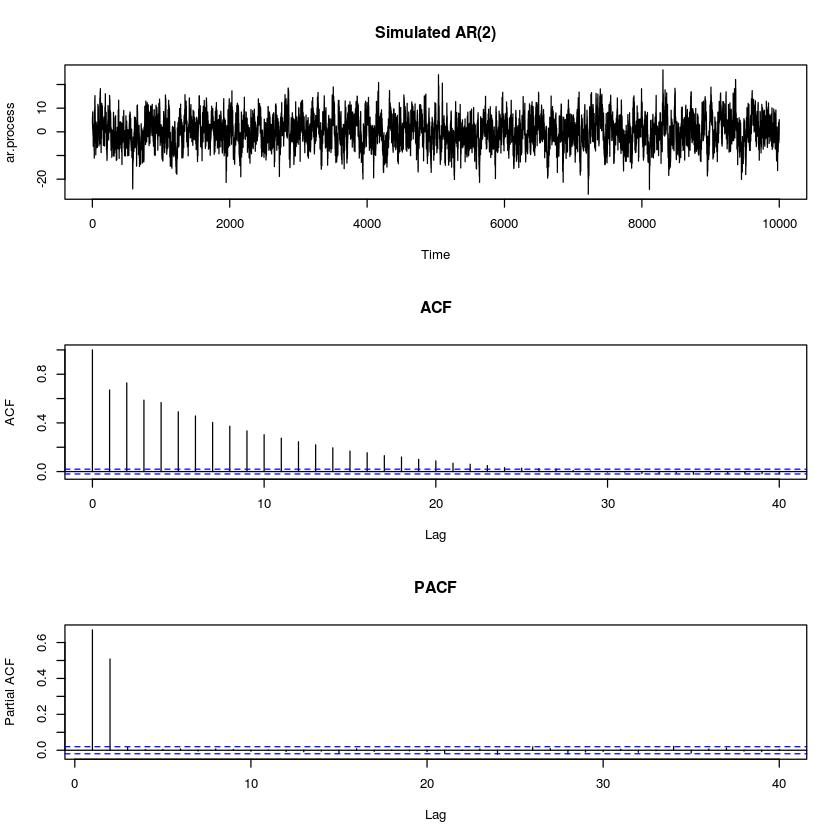

In [17]:
par(mfrow=c(3,1))
plot(ar.process, main='Simulated AR(2)')
acf(ar.process, main='ACF')
pacf(ar.process, main='PACF')